Explorative Datananalyse (EDA)

Environment für dieses Notebook: `ads-ml-light` (*requirements-py3.11-ads-ml-light.txt*).

## Daten & Preprocessing

In [17]:
from pathlib import Path

URL = (
    "https://data.milwaukee.gov/dataset/7a8b81f6-d750-4f62-aee8-30ffce1c64ce/resource/f083631f-e34e-4ad6-aba1-d6d7dd265170/download/2002-2018-property-sales-data.csv"
)
data = Path("/Users/knaflhei/Documents/DBUSA/data/2002-2018-property-sales-data.csv") 

In [18]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/2002-2018-property-sales-data.csv") 
data.head()

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Commercial,3230461110,2628 N 6TH ST,NaN,6,6258,Commercial Exempt,NaN,2.0,1880,0,1840,1,0,0,0,12750,2002-01,15900
1,Commercial,3590192000,1363 N PROSPECT AV,NaN,3,6262,Mansions With Commercial Usage,NaN,2.0,1876,0,6377,1,0,0,0,11840,2002-01,850000
2,Commercial,4161194000,617 S 94TH ST,NaN,10,6272,Service Building,NaN,1.0,1954,0,5022,1,0,0,0,9700,2002-01,119000
3,Commercial,1719836000,3624 W SILVER SPRING DR,NaN,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955,0,6420,1,0,0,0,8792,2002-01,210000
4,Commercial,3480290000,3830 W LISBON AV,NaN,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909,0,5956,1,0,0,0,4840,2002-01,48500


In [11]:
data.columns

Index(['PropType', 'Taxkey', 'Address', 'CondoProject', 'District', 'Nbhd',
       'Style', 'Extwall', 'Stories', 'Year_Built', 'Nr_of_rms', 'Fin_sqft',
       'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date',
       'Sale_price'],
      dtype='object')

In [12]:
data.columns = [x.lower() for x in data.columns.to_list()]

In [13]:
data.columns

Index(['proptype', 'taxkey', 'address', 'condoproject', 'district', 'nbhd',
       'style', 'extwall', 'stories', 'year_built', 'nr_of_rms', 'fin_sqft',
       'units', 'bdrms', 'fbath', 'hbath', 'lotsize', 'sale_date',
       'sale_price'],
      dtype='object')

## Matplotlib

Analysen

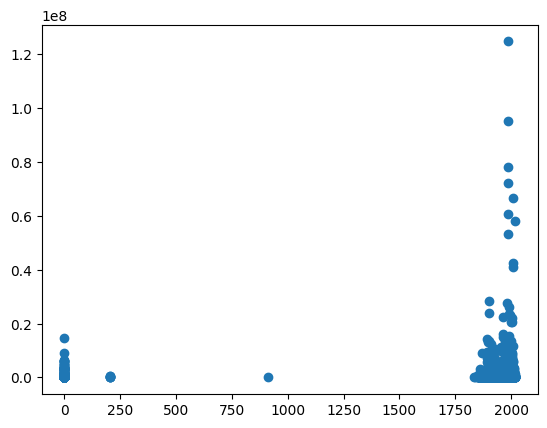

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x=data["Year_Built"], y=data["Sale_price"])
plt.show()

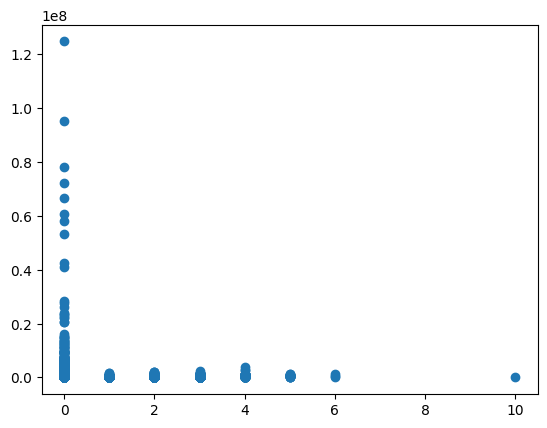

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x=data["Fbath"], y=data["Sale_price"])
plt.show()

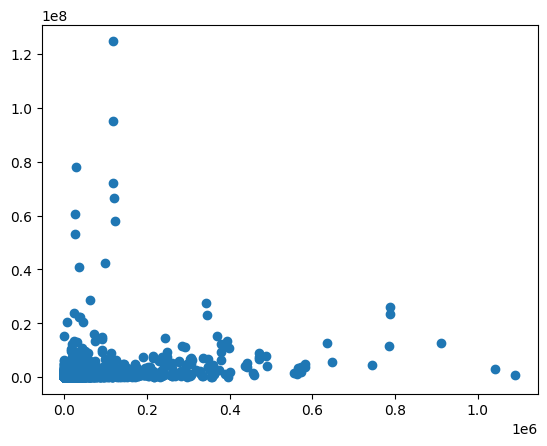

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x=data["lotsize"], y=data["sale_price"])
plt.show()

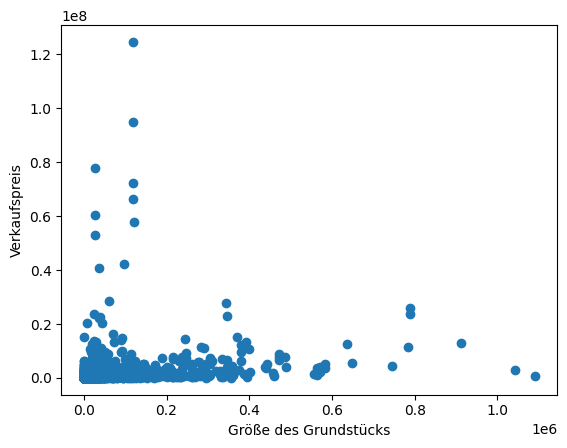

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x=data["Lotsize"], y=data["Sale_price"])
plt.xlabel('Größe des Grundstücks')  # Beschriftung für die X-Achse
plt.ylabel('Verkaufspreis')  # Beschriftung für die Y-Achse
plt.show()

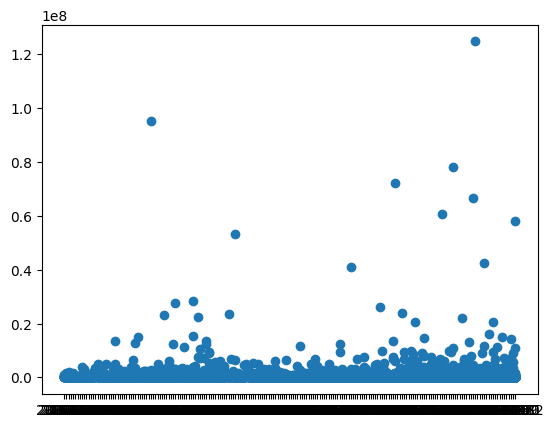

In [59]:
import matplotlib.pyplot as plt

plt.scatter(x=data["Sale_date"], y=data["Sale_price"])
plt.show()

In [22]:
import numpy as np

X = data["Sale_date"]
y = data["Sale_price"]

m, b = np.polyfit(X, y, 1)
plt.scatter(X, y, alpha=0.05)
plt.plot(X, m * X + b, color="red")
plt.title("Sales_date vs. Sale_Price")
plt.xlabel("Sale_date")
plt.ylabel("Sale_price")
plt.show()

TypeError: can only concatenate str (not "float") to str

In [64]:
import numpy as np

X = data["Sale_date"]
y = data["Sale_price"]

m, b = np.polyfit(X, y, 1)
plt.scatter(X, y, alpha=0.1)
plt.plot(X, m * X + b, color="red")
plt.title("Sale_date vs. Sale_Price")
plt.xlabel("Sale_date")
plt.ylabel("Sale_price")
plt.show()

TypeError: can only concatenate str (not "float") to str

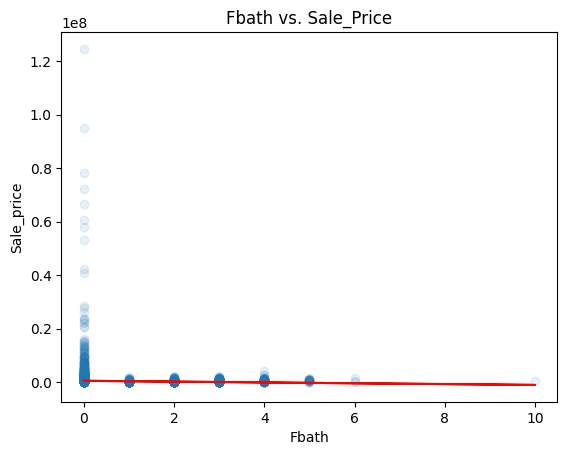

In [56]:
import numpy as np

X = data["Fbath"]
y = data["Sale_price"]

m, b = np.polyfit(X, y, 1)
plt.scatter(X, y, alpha=0.1)
plt.plot(X, m * X + b, color="red")
plt.title("Fbath vs. Sale_Price")
plt.xlabel("Fbath")
plt.ylabel("Sale_price")
plt.show()

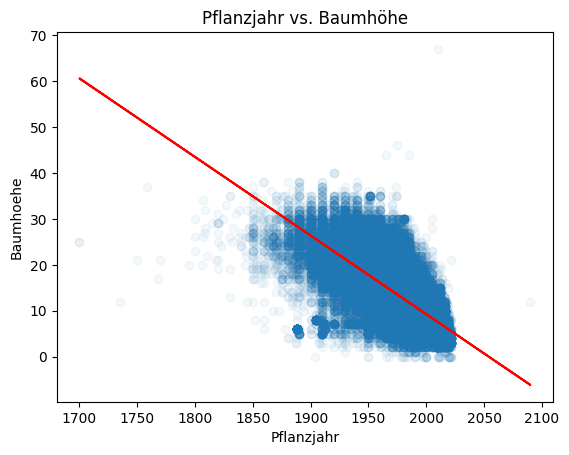

In [7]:
import numpy as np

X = data["pflanzjahr"]
y = data["baumhoehe"]

m, b = np.polyfit(X, y, 1)
plt.scatter(X, y, alpha=0.05)
plt.plot(X, m * X + b, color="red")
plt.title("Pflanzjahr vs. Baumhöhe")
plt.xlabel("Pflanzjahr")
plt.ylabel("Baumhoehe")
plt.show()

### Verkaufdatum 

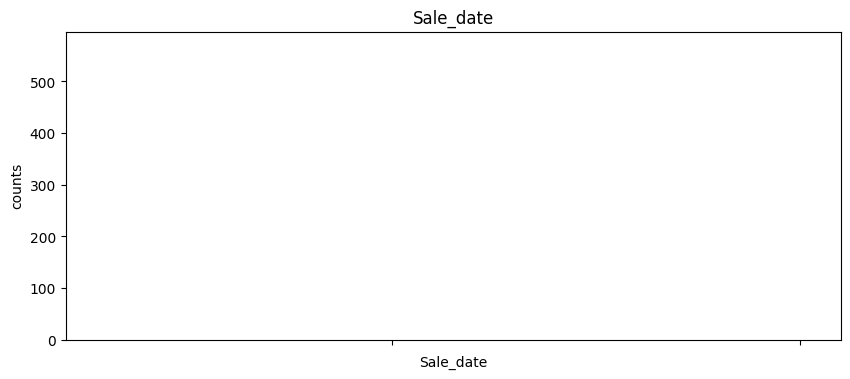

In [23]:
from matplotlib.ticker import MultipleLocator

pj_counts = data["Sale_date"].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(x=pj_counts.index, height=pj_counts.values)
plt.xlabel("Sale_date")
plt.ylabel("counts")
plt.title("Sale_date")
plt.xlim(2002, 2021)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.show()

### Badezimmer

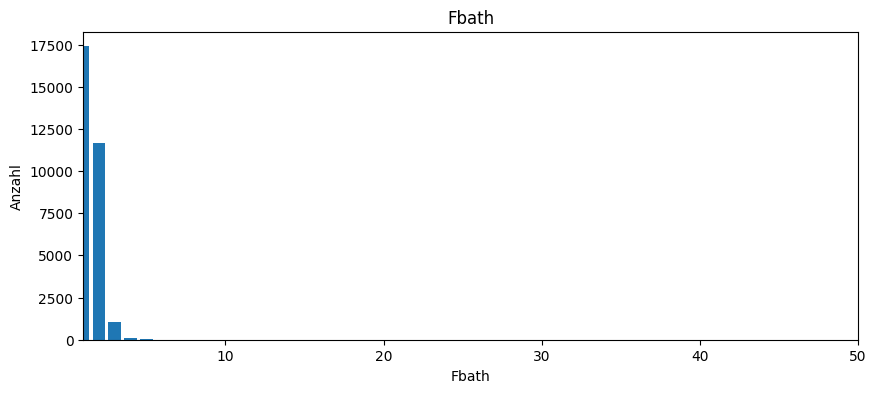

In [24]:
from matplotlib.ticker import MultipleLocator

pj_counts = data["Fbath"].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(x=pj_counts.index, height=pj_counts.values)
plt.xlabel("Fbath")
plt.ylabel("Anzahl")
plt.title("Fbath")
plt.xlim(1, 50)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.show()

### Grundstücksgröße

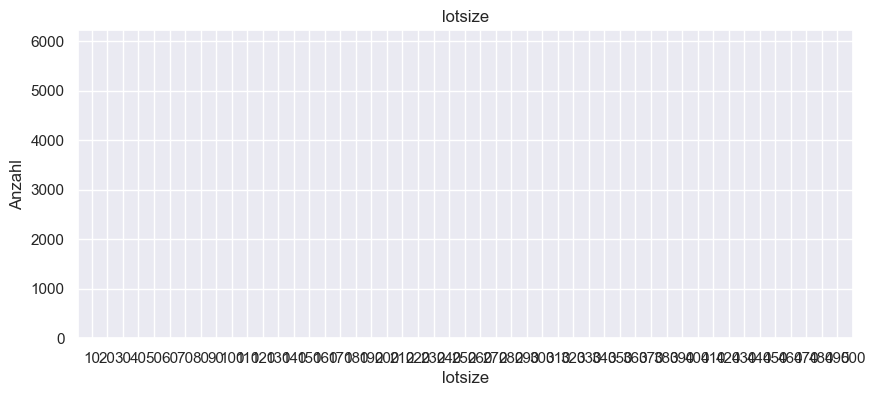

In [89]:
from matplotlib.ticker import MultipleLocator

pj_counts = data["Lotsize"].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(x=pj_counts.index, height=pj_counts.values)
plt.xlabel("lotsize")
plt.ylabel("Anzahl")
plt.title("lotsize")
plt.xlim(1, 500)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.show()

### Pflanzjahr

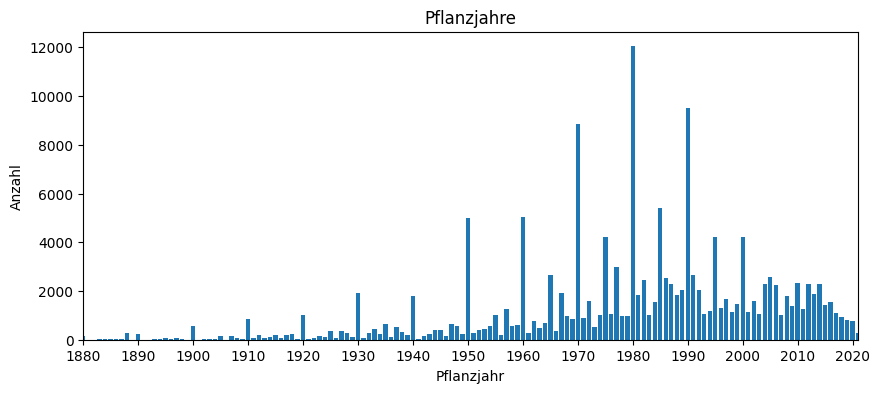

In [8]:
from matplotlib.ticker import MultipleLocator

pj_counts = data["pflanzjahr"].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(x=pj_counts.index, height=pj_counts.values)
plt.xlabel("Pflanzjahr")
plt.ylabel("Anzahl")
plt.title("Pflanzjahre")
plt.xlim(1880, 2021)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.show()

### Korrelationsmatrix

Referenz zu Heatmaps mit Matplotlib: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

In [71]:
corr = data.select_dtypes(exclude=["object"]).corr().round(2)
corr

,Taxkey,District,Nbhd,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
Taxkey,1.00,0.66,0.50,-0.02,0.01,-0.09,-0.04,0.03,0.01,0.01,-0.06,-0.06,-0.00
District,0.66,1.00,0.24,-0.02,-0.00,-0.22,-0.03,0.05,0.01,-0.04,-0.00,0.02,-0.03
Nbhd,0.50,0.24,1.00,0.10,-0.10,0.40,0.17,-0.13,-0.07,-0.29,-0.20,0.09,0.11
Stories,-0.02,-0.02,0.10,1.00,0.21,0.01,0.42,0.29,0.01,0.08,0.13,-0.01,0.26
Year_Built,0.01,-0.00,-0.10,0.21,1.00,0.05,0.02,0.09,0.03,0.18,0.09,-0.12,-0.01
Nr_of_rms,-0.09,-0.22,0.40,0.01,0.05,1.00,-0.05,-0.15,-0.03,0.16,0.02,-0.13,-0.00
Fin_sqft,-0.04,-0.03,0.17,0.42,0.02,-0.05,1.00,-0.01,-0.03,-0.18,-0.06,0.50,0.48
Units,0.03,0.05,-0.13,0.29,0.09,-0.15,-0.01,1.00,0.07,0.44,-0.07,-0.04,-0.03
Bdrms,0.01,0.01,-0.07,0.01,0.03,-0.03,-0.03,0.07,1.00,0.10,0.03,-0.02,-0.02
Fbath,0.01,-0.04,-0.29,0.08,0.18,0.16,-0.18,0.44,0.10,1.00,0.06,-0.19,-0.08


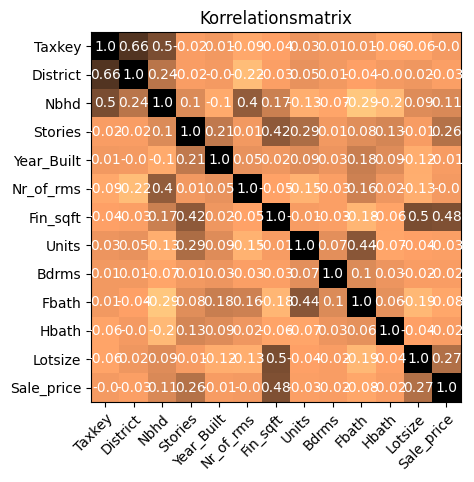

In [72]:
fig, ax = plt.subplots()
ax.imshow(corr, cmap=plt.get_cmap("copper_r"))
ax.set_xticks(np.arange(len(corr)), labels=corr.columns.to_list())
ax.set_yticks(np.arange(len(corr)), labels=corr.columns.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, corr.iloc[i, j], ha="center", va="center", color="w")

ax.set_title("Korrelationsmatrix")
plt.show()

## Seaborn

In [73]:
import seaborn as sns

sns.set_theme(color_codes=True)

### Paarweise Zusammenhänge via Pairplot

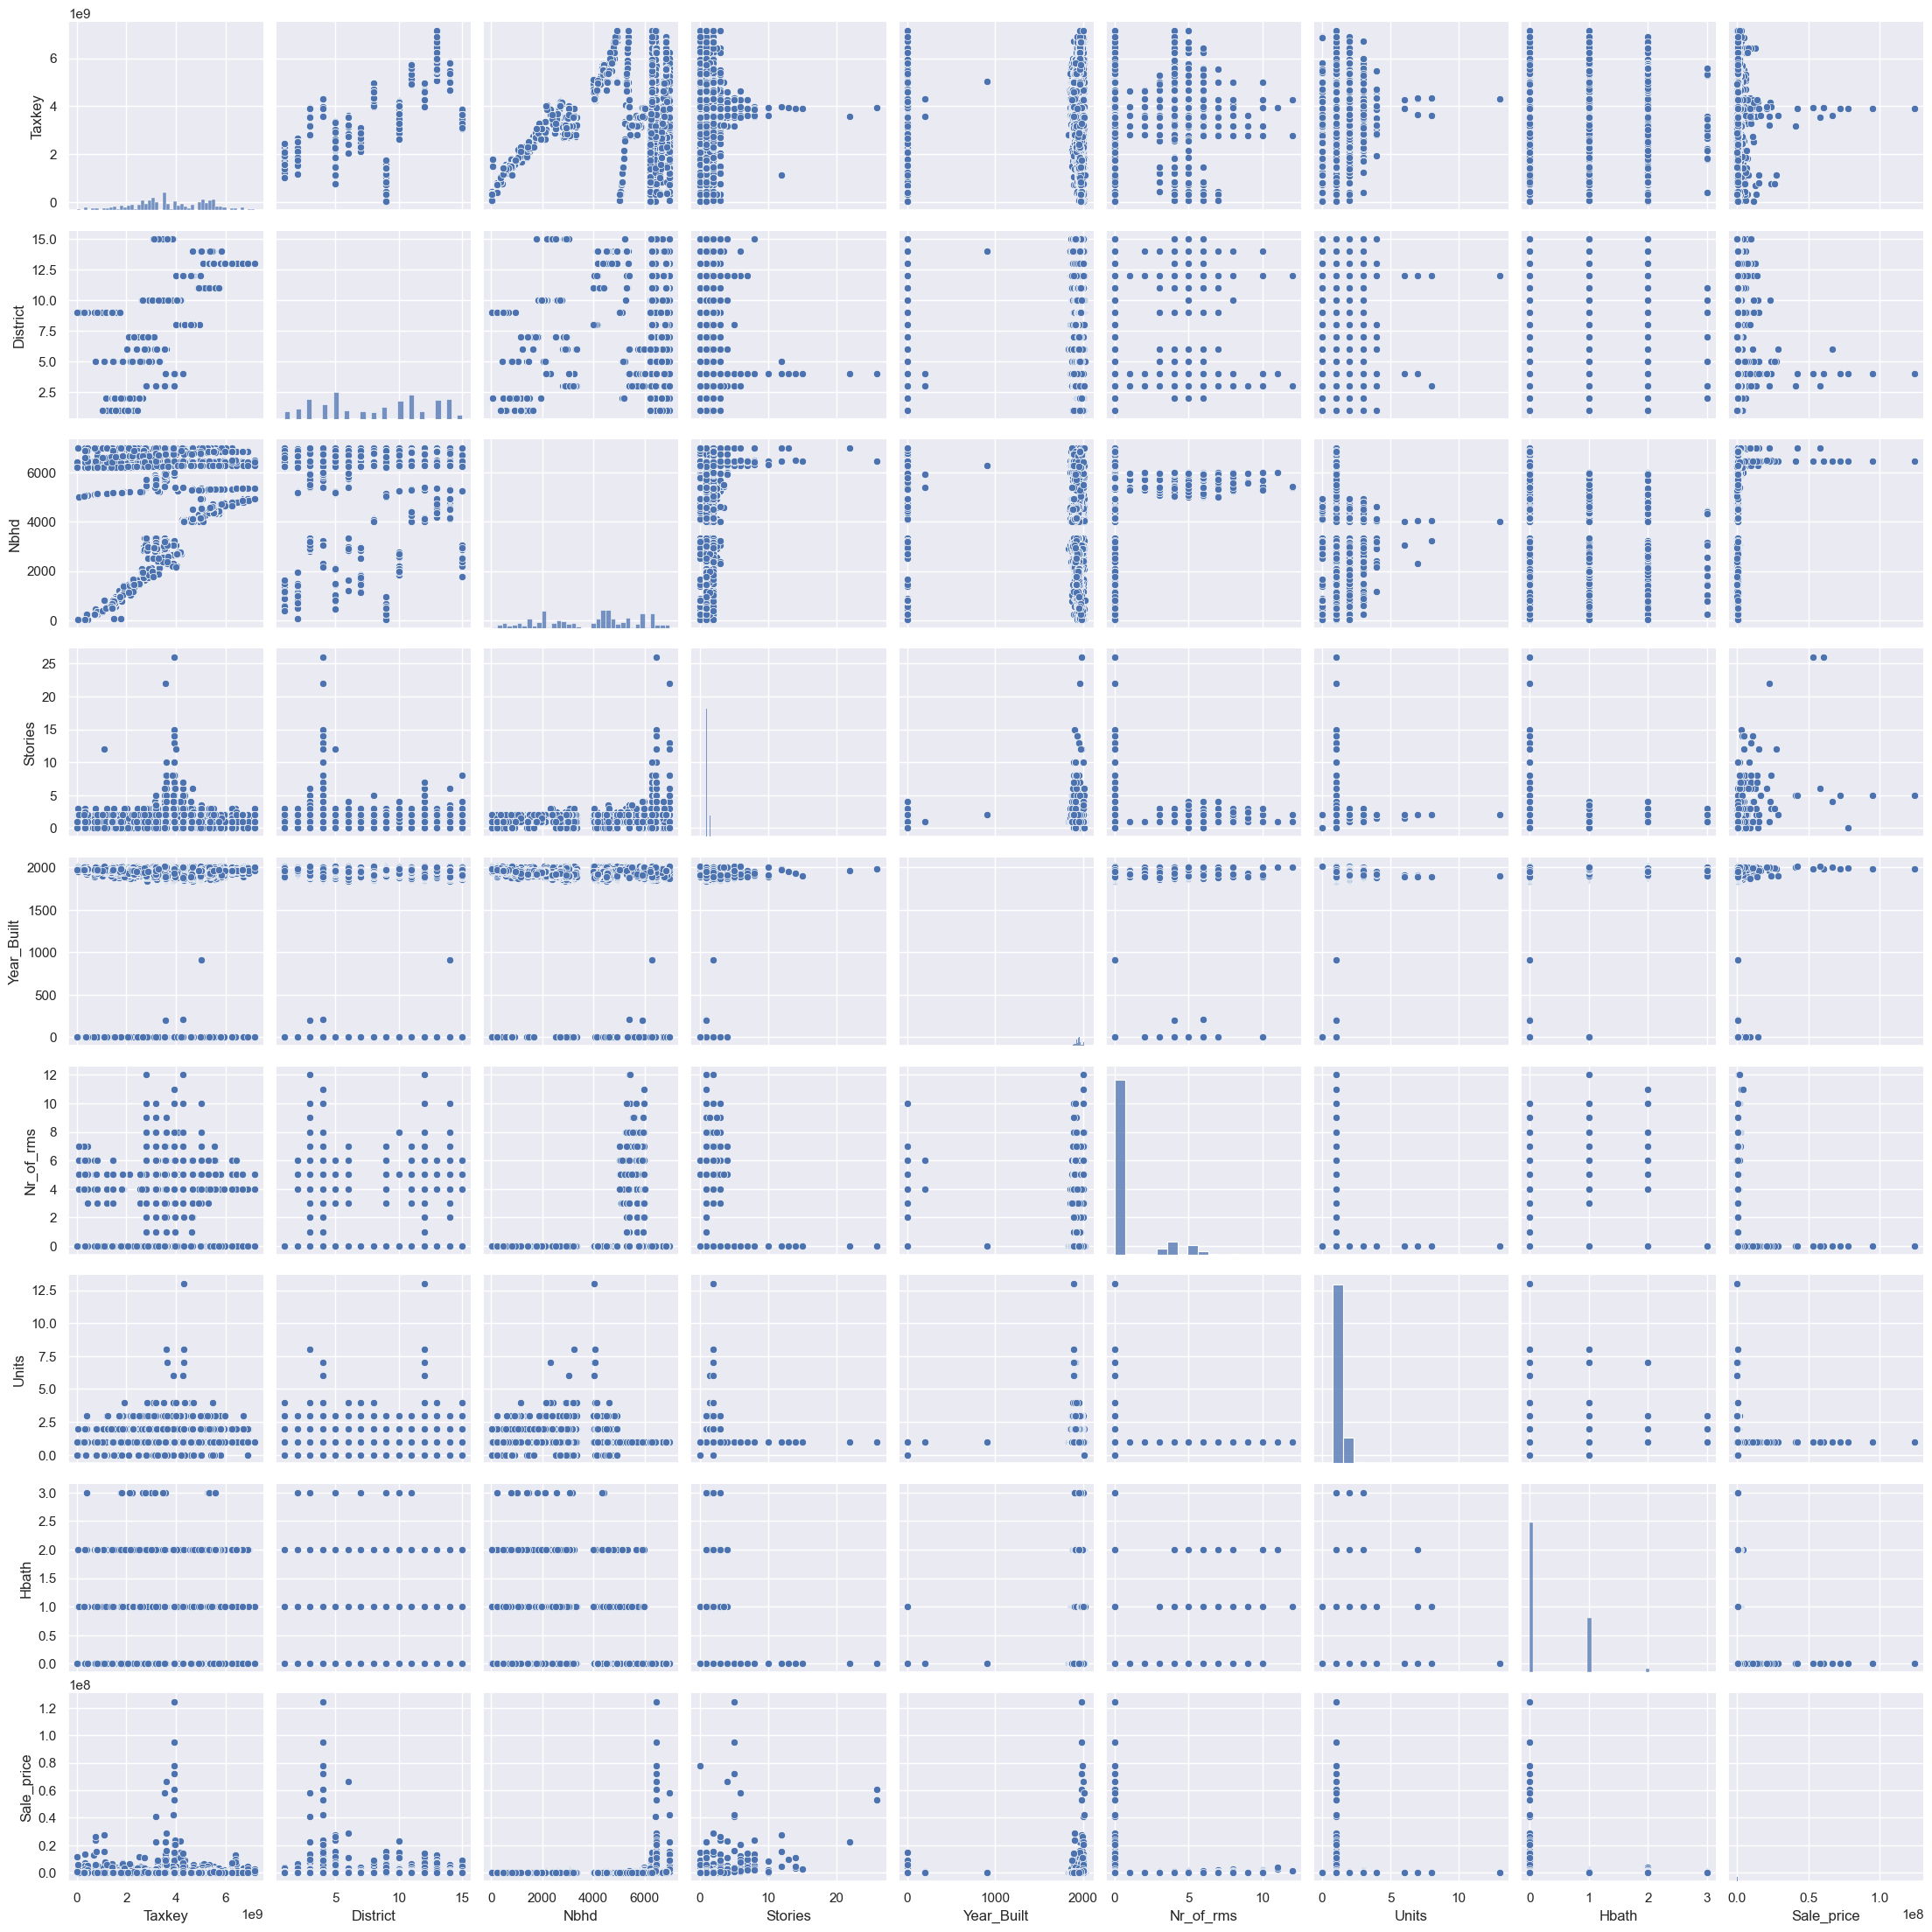

In [90]:
g = sns.pairplot(data.drop(labels=["Lotsize", "Fin_sqft", "Bdrms", "Fbath"], axis=1))

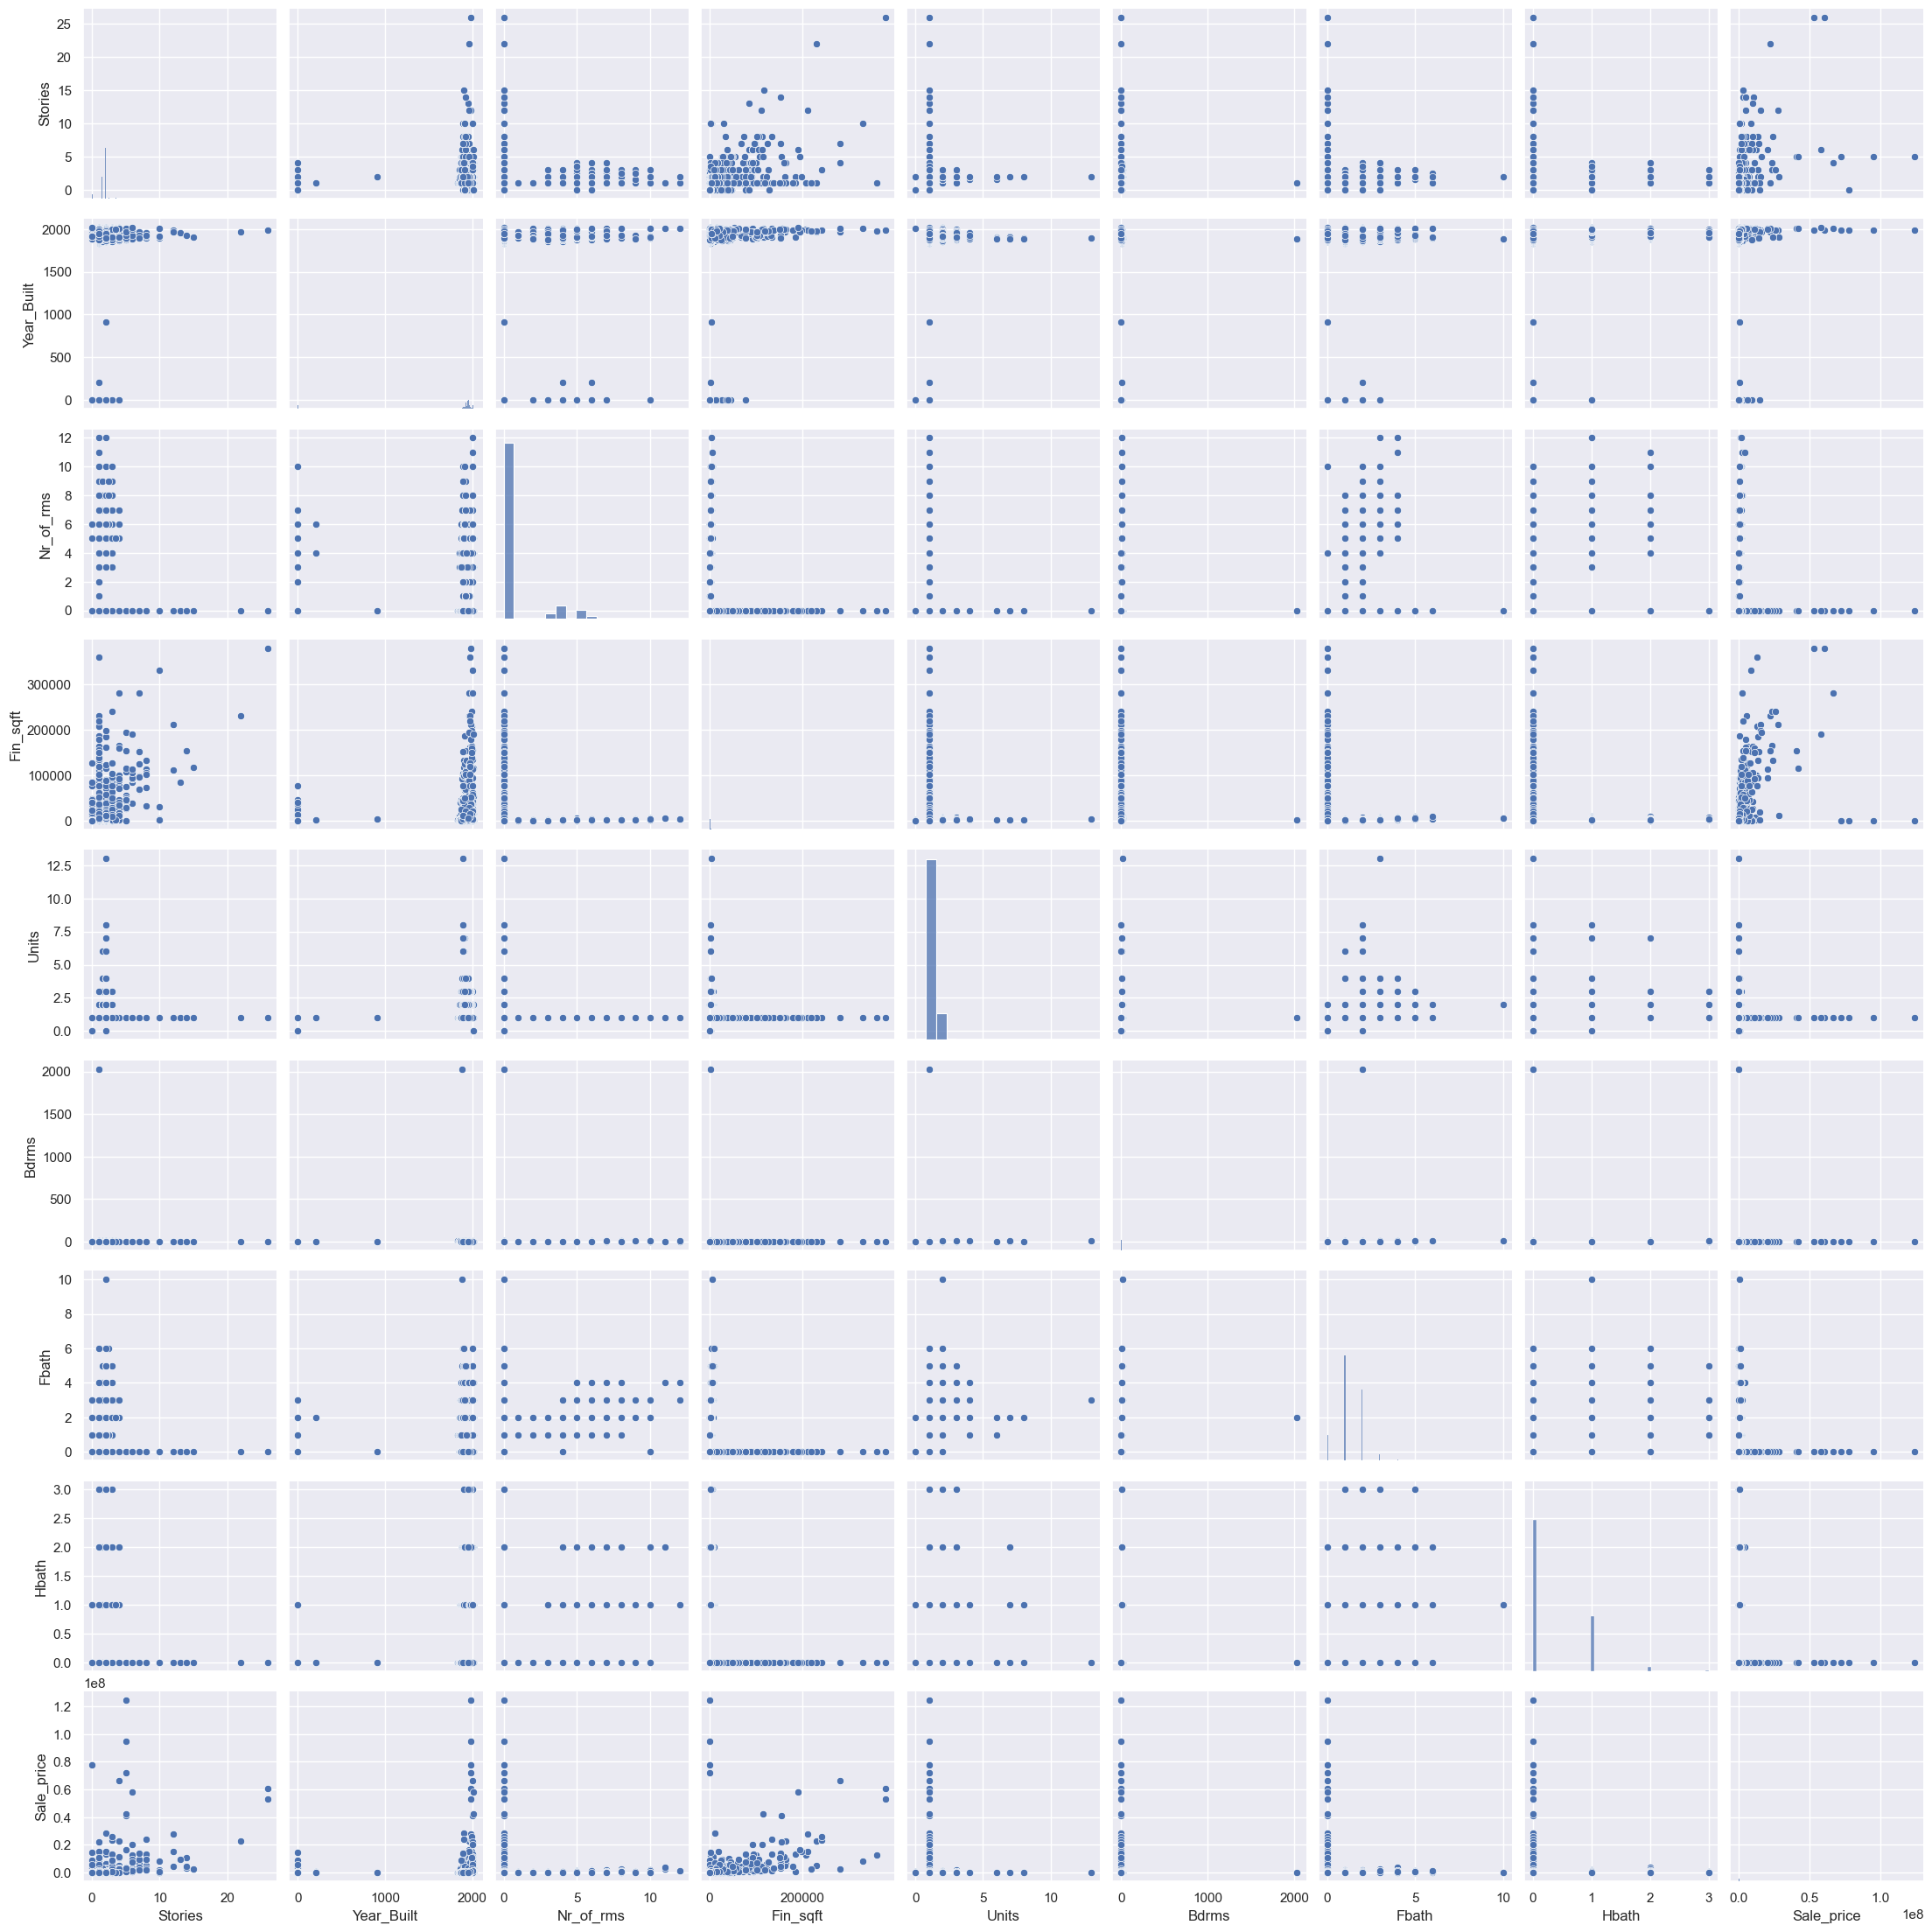

In [91]:
g = sns.pairplot(data.drop(labels=["Lotsize", "Taxkey", "District", "Nbhd"], axis=1))

In [94]:
data[data["Lotsize"] > 50]

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Commercial,3230461110,2628 N 6TH ST,NaN,6,6258,Commercial Exempt,NaN,2.0,1880,0,1840,1,0,0,0,12750,2002-01,15900
1,Commercial,3590192000,1363 N PROSPECT AV,NaN,3,6262,Mansions With Commercial Usage,NaN,2.0,1876,0,6377,1,0,0,0,11840,2002-01,850000
2,Commercial,4161194000,617 S 94TH ST,NaN,10,6272,Service Building,NaN,1.0,1954,0,5022,1,0,0,0,9700,2002-01,119000
3,Commercial,1719836000,3624 W SILVER SPRING DR,NaN,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955,0,6420,1,0,0,0,8792,2002-01,210000
4,Commercial,3480290000,3830 W LISBON AV,NaN,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909,0,5956,1,0,0,0,4840,2002-01,48500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34518,Commercial,2420009000,4141 N RICHARDS ST,NaN,6,6236,Warehouse Building - 1 Story,NaN,1.0,1949,0,4800,1,0,0,0,9000,2018-12,165000
34519,Vacant Land,2070279100,3202 W CAMERON AV,NaN,1,6232,Commercial Land,NaN,0.0,0,0,0,1,0,0,0,7800,2018-12,3900
34520,Vacant Land,6889973111,6154 S 13TH ST,NaN,13,6290,Commercial Land,NaN,0.0,0,0,0,1,0,0,0,152286,2018-12,100000
34521,Vacant Land,1120017000,7351 N BEAU AV,NaN,5,820,**,NaN,0.0,0,0,0,0,0,0,0,8925,2018-12,362400


In [95]:
data = data[data["Lotsize"] < 1000]

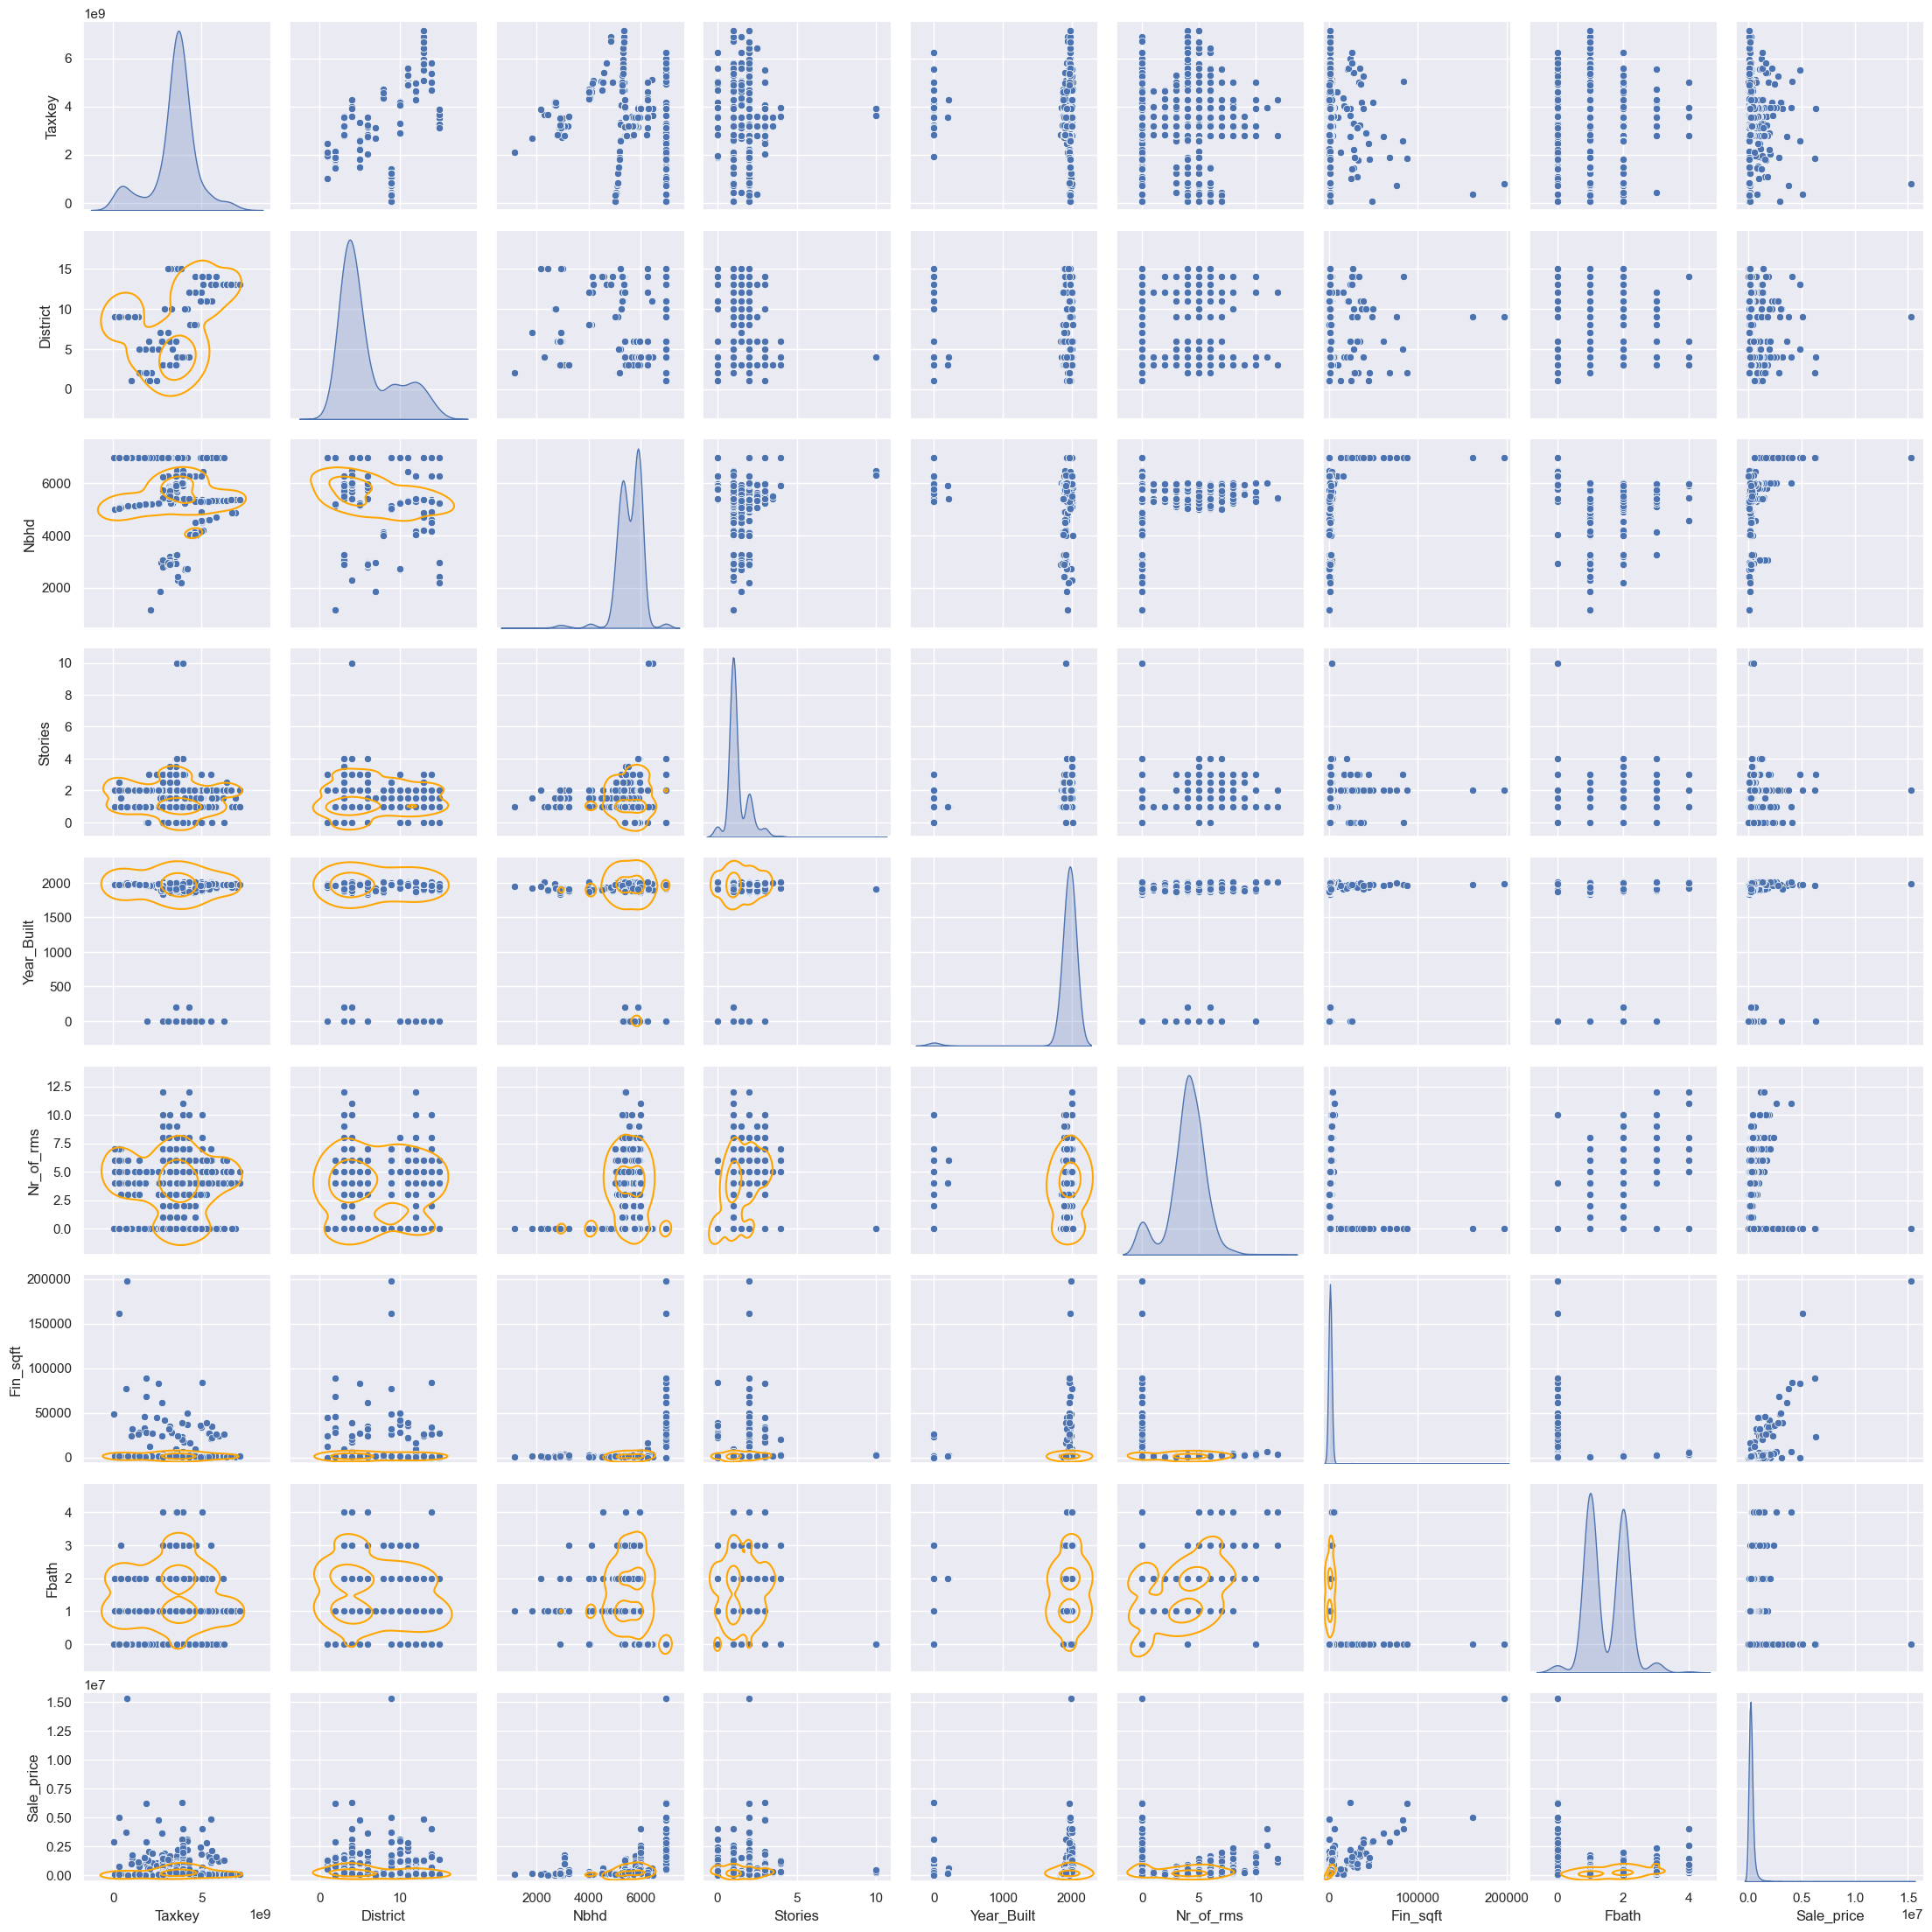

In [97]:
g = sns.pairplot(
    data.drop(labels=["Bdrms", "Lotsize", "Hbath", "Units"], axis=1),
    diag_kind="kde",
    diag_kws={"bw_adjust": 2},
)
g.map_lower(sns.kdeplot, levels=3, color="orange", bw_adjust=2)

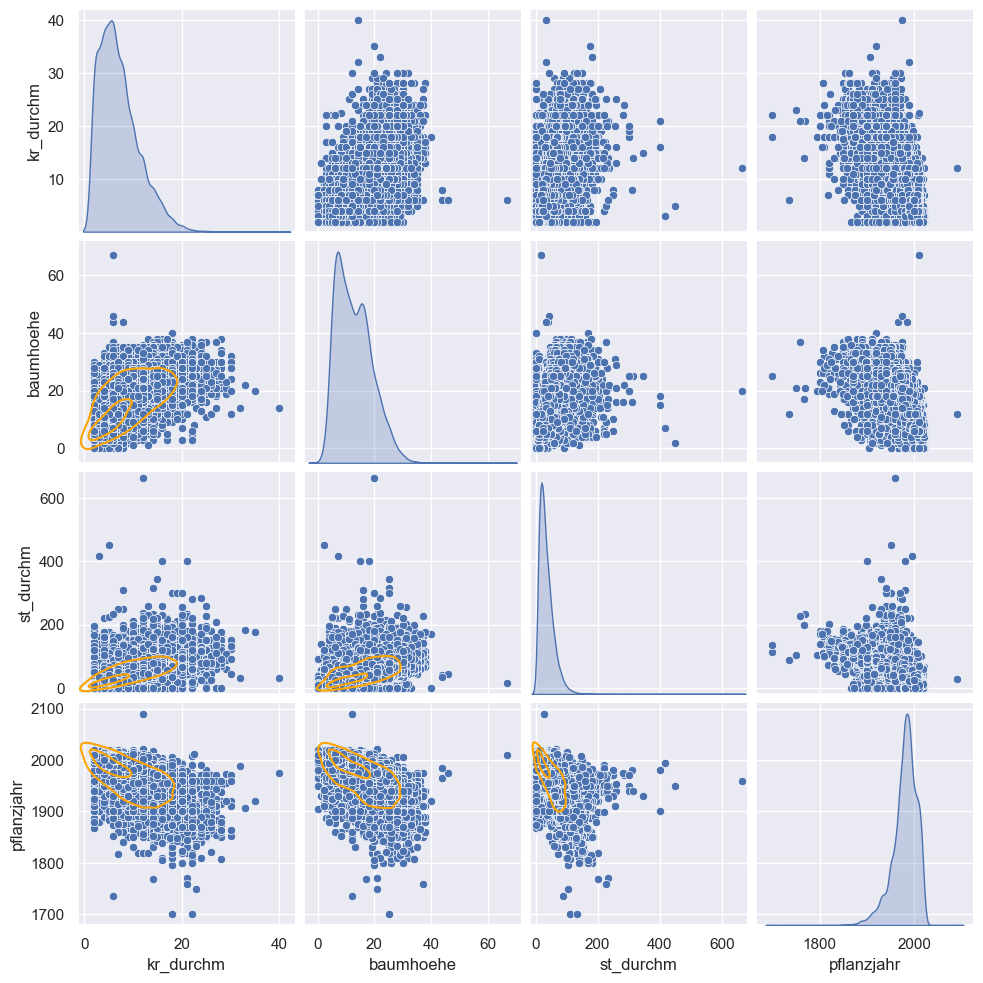

In [15]:
g = sns.pairplot(
    data.drop(labels=["kr_r", "st_umfang", "hochwert", "rechtswert"], axis=1),
    diag_kind="kde",
    diag_kws={"bw_adjust": 2},
)
g.map_lower(sns.kdeplot, levels=3, color="orange", bw_adjust=2)

In [16]:
data["gattung"].value_counts()[:20]

gattung
Acer         35539
Tilia        14949
Carpinus     13833
Quercus      13080
Platanus      9168
Fraxinus      7100
Prunus        6510
Aesculus      6389
Taxus         5201
Betula        3955
Robinia       3570
Populus       3168
Fagus         2991
Pinus         2686
Picea         2658
Malus         2317
Alnus         2056
Corylus       1968
Crataegus     1809
Salix         1783
Name: count, dtype: int64

In [17]:
common_trees = data["gattung"].value_counts()[:20].index.to_list()

In [18]:
sum(data["gattung"].value_counts()[:20]) / len(data)

0.8840601560438732

Die 20 häufigsten Bäume machen 88% aller Bäume aus

In [19]:
common = data.query(f"gattung == @common_trees")

### Ridge Plots: Gattung zu Baumhöhe

along the example by seaborn: https://seaborn.pydata.org/examples/kde_ridgeplot.html

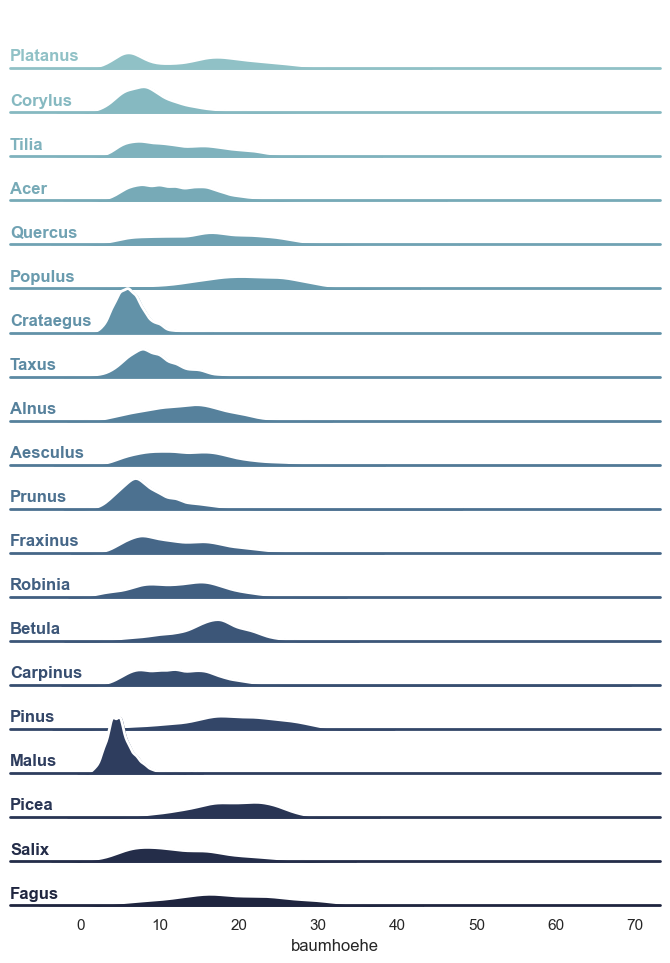

In [20]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(common_trees), rot=-0.25, light=0.7)
g = sns.FacetGrid(common, row="gattung", hue="gattung", aspect=15, height=0.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "baumhoehe", bw_adjust=1.2, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "baumhoehe", clip_on=False, color="w", lw=2, bw_adjust=1.2)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "baumhoehe")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

## Plotly

### Geodaten

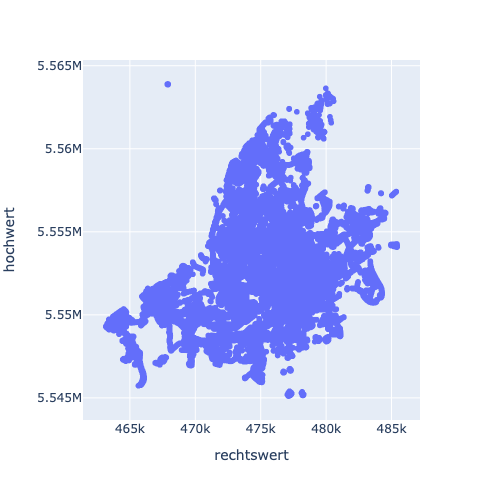

In [22]:
import plotly.express as px

# fig = px.scatter(data, "rechtswert", "hochwert", width=500, height=500)
# fig.show()
fig.show(renderer="png")  # digitales Skript (statisch)

#### Konversion der Georeferenzierung

Dem Umriss Frankfurt entsprechend sehen die Geodaten valide aus. Die Georeferenzierung ETRS89 ist auf der Seite der Stadt Frankfurt erwähnt und [deutscher Standard](https://www.bkg.bund.de/SharedDocs/Produktinformationen/BKG/DE/P-2020/200310_GeoGitter.html). Zur Nutzung mit Plotly muss es in GPS-Koordinaten umgerechnet werden.

In [23]:
import pyproj

# UTM Zone und Hemisphäre definieren
zone_number = 32
zone_letter = "U"

easting = data["rechtswert"]
northing = data["hochwert"]

# Definition der Projektionen
utm_proj = pyproj.CRS.from_dict(
    {"proj": "utm", "zone": zone_number, "ellps": "WGS84", "hemisphere": zone_letter}
)
latlon_proj = pyproj.CRS.from_dict({"proj": "latlong", "ellps": "WGS84"})

# Definition des Transformers + Konversion
transformer = pyproj.Transformer.from_crs(utm_proj, latlon_proj)
data["lon"], data["lat"] = transformer.transform(easting, northing)

#### Mapbox Access Token

Standardmäßig kann Plotly sehr einfache Karten darstellen, welche aber keine Layer über Grenzlinien hinweg haben. Zur Darstellung der Bäume ist eine Map Layer von Vorteil, um zu sehen, wo genau sich die Bäume befinden.

Mit Mapbox kann Open Source Kartenmaterial eingebunden werden, erstellt euch hierzu einen Account. Auf der Account Seite bekommt ihr euren persönlichen Token angezeigt. Legt diesen in eure `.env` Datei ab. Hinterlegt ihr den Access Token nicht oder nicht richtig, wird kein Plot angezeigt.

Zusätzlich könnt ihr im [Mapbox-Studio](https://studio.mapbox.com/) noch einen Karten-Style anlegen. Legt die Style URL auch in eure `.env`.

In [24]:
import os

from dotenv import load_dotenv

load_dotenv()

px.set_mapbox_access_token(os.getenv("MAPBOX_ACCESS_TOKEN", None))

In [30]:
fig = px.scatter_mapbox(
    data[data["pflanzjahr"] < 2021],  # outlier machen die Farbskala kaputt
    lat="lat",
    lon="lon",
    color="pflanzjahr",
    size="kr_durchm",
    width=1200,
    height=600,
    color_continuous_scale=["yellow", "red", "purple", "blue"],
    zoom=10,
    # mapbox_style=os.getenv("MAPBOX_STYLE_URL", None),
)

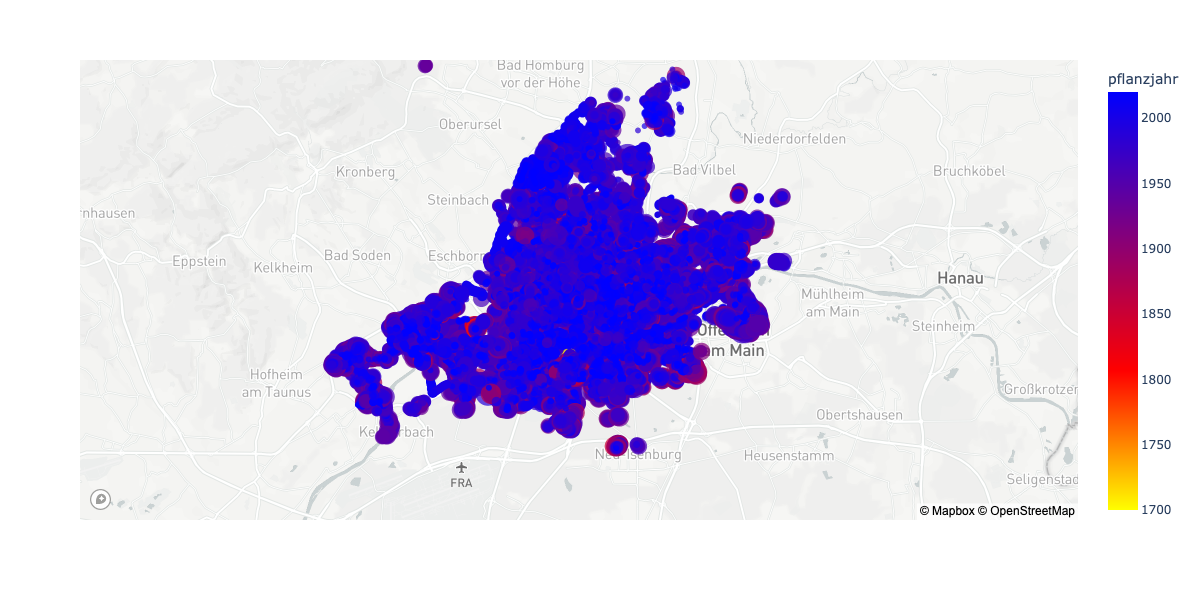

In [31]:
# fig.show()

# digitales Skript (statisch)
from IPython.display import Image

img_bytes = fig.to_image(format="png")
Image(img_bytes)

## Pandas Plotting-Backends

In [54]:
gebiet_val_counts = pd.DataFrame(data[["gebiet"]].value_counts()[:15])
gebiet_val_counts

,count
gebiet,
Grünanlagen,52113
Straßen,51636
Friedhof,20257
Park,14389
40 Stadtschulamt,6232
52 Sportamt,5397
48 Kita Frankfurt,2309
Sportparkstadion,1536
Spielplätze,1321


In [55]:
type(gebiet_val_counts)

pandas.core.frame.DataFrame

### Bäume nach Gebiet
#### Matplotlib

<Axes: title={'center': 'Bäume nach Gebiet'}, xlabel='Gebiet', ylabel='Count'>

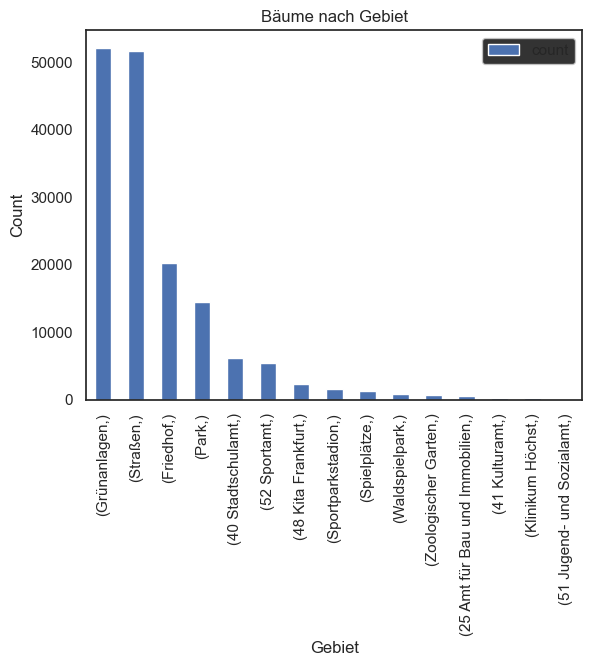

In [56]:
gebiet_val_counts.plot(kind="bar", title="Bäume nach Gebiet", xlabel="Gebiet", ylabel="Count")